<a href="https://colab.research.google.com/github/moadahir/PythonProjects/blob/main/Group2_AttritionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING EMPLOYEE ATTRITION**

We analyse the IBM HR Employee Attrition dataset to identify key factors  influencing employee turnover and to build a classification model that predicts attrition. This dataset is appropriate for our objectives due to its manageable size (1,470 records), diverse feature set, and strong relevance to real-world HR analytics. However, challenges such as potential missing values, irrelevant features, and class imbalance must be considered, as these issues can affect model performance and require careful preprocessing.

Questions and hypothesis we will be asking.

 # **Section 1: Import Libraries and Dataset**

##**1.1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, make_scorer, f1_score, precision_score, recall_score
import warnings  # stop the warnings
warnings.filterwarnings('ignore')

##**1.2. Load Dataset**

In [2]:
df = pd.read_csv("IBM_employee_attrition_eng.csv")

 # **Section 2: Exploratory Data Analysis**

##**2.1. Basic Structure of Dataset**

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8,0.0,1,6,4,0.0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10,3.0,3,10,7,1.0,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7,3.0,3,0,0,0.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8,3.0,3,8,7,3.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6,3.0,3,2,2,2.0,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [7]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


identify categorical and numerical columns seperately.

In [8]:
df.select_dtypes(include=["int", "float"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.select_dtypes(exclude=["int", "float"]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
df.select_dtypes(exclude=["object"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##**2.2. Missing Values and Duplicates**

In [11]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [12]:
df.duplicated().sum()

np.int64(0)

##**2.3. Distribution Analysis**

**Visualisation plot of the distribution of the Age (fundmentally continous numerical), Monthly Income (continous numerical) and Total Working Years (continous numerical)  using histograms**

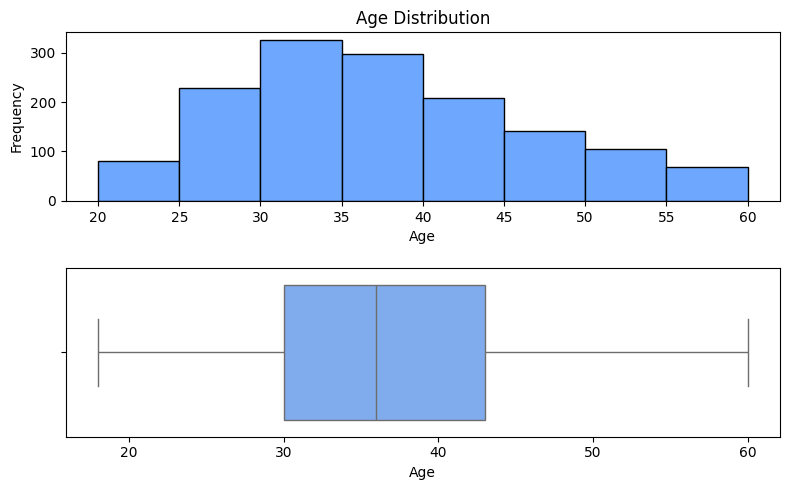

In [13]:
# AGE: histogram + boxplot to see spread + outliers
bins_age = [20, 25, 30, 35, 40, 45, 50, 55, 60]

plt.figure(figsize=(8, 5))

# top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["Age"], bins=bins_age, edgecolor="black", color="#6EA8FE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

# bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["Age"], color="#6EA8FE")
plt.xlabel("Age")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


Average age: roughly 36–38 years old. (df.describe()provides mean, median, standard deviation, etc)

The distribution is bell-shaped, with most employees between 30 and 40.

Very few employees are under 25 or over 55.

This indicates the workforce is mainly mid-career, with balanced representation and no extreme skew.






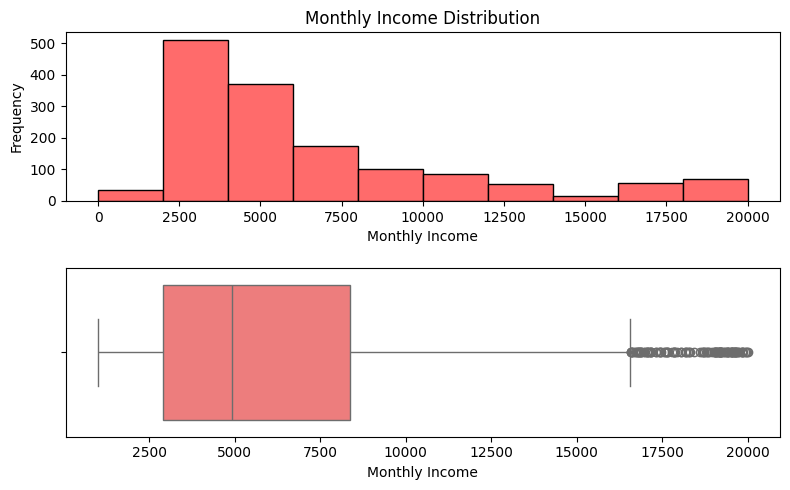

In [14]:
# MONTHLY INCOME: histogram + boxplot
bins_income = [0, 2000, 4000, 6000, 8000, 10000,
               12000, 14000, 16000, 18000, 20000]

plt.figure(figsize=(8, 5))

# Top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["MonthlyIncome"], bins=bins_income,
         edgecolor="black", color="#FF6B6B")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")

# Bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["MonthlyIncome"], color="#FF6B6B")
plt.xlabel("Monthly Income")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()



average monthly income 7k 6,500 - 7,000 ,
(based on typical IBM HR dataset statistics such as mean ≈ 6.5k df.describe()provides mean, median, standard deviation, etc)

The distribution is heavily right-skewed, meaning most employees earn on the lower end of the salary range while fewer employees earn very high incomes.

Most employees cluster between 2,000 and 6,000, shown by the tall bars on the left side of the histogram.

Very high earners (12,000–20,000) are rare, shown by much shorter bars on the right.

This pattern is typical in organisations with many entry-/mid-level staff and a small number of senior or specialist roles earning significantly more.





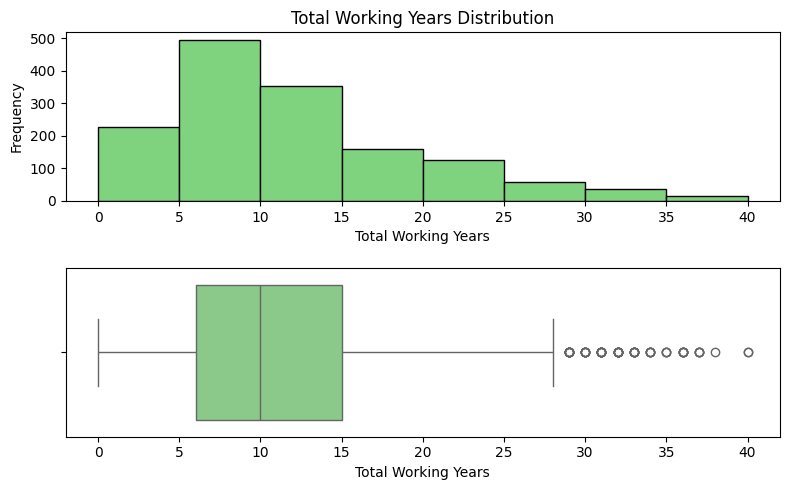

In [15]:
# TOTAL WORKING YEARS: histogram + boxplot
bins_years = [0, 5, 10, 15, 20, 25, 30, 35, 40]

plt.figure(figsize=(8, 5))

# Top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["TotalWorkingYears"], bins=bins_years,
         edgecolor="black", color="#7FD37F")
plt.xlabel("Total Working Years")
plt.ylabel("Frequency")
plt.title("Total Working Years Distribution")

# Bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["TotalWorkingYears"], color="#7FD37F")
plt.xlabel("Total Working Years")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


Average total working years: around 10–12 years.

The shape is right-skewed — most employees have low to mid experience (0–15 years).

Very few employees have 25–40 years of experience.

Suggests a workforce with many early-career to mid-career staff and fewer long-tenure veterans.



**Frequency of categorical columns Job Role,Department and Education Field using bar Charts**

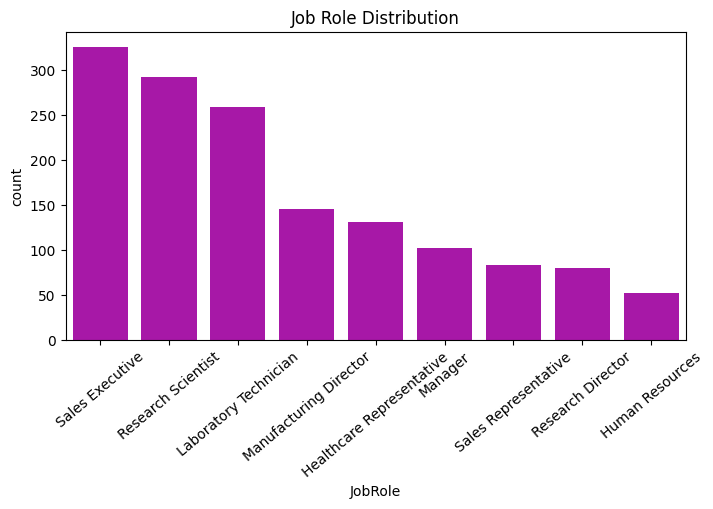

In [16]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["JobRole"], color = "m")
plt.title("Job Role Distribution")
plt.xticks(rotation = 40)
plt.show()

Distribution is uneven, with some roles far more common.

Sales Executive, Research Scientist, and Laboratory Technician show the highest counts.

Roles like Research Director, Sales Representative, and Human Resources have much fewer employees.

Indicates the company is built around scientific, technical, and sales-focused roles, with fewer managerial or specialised positions.

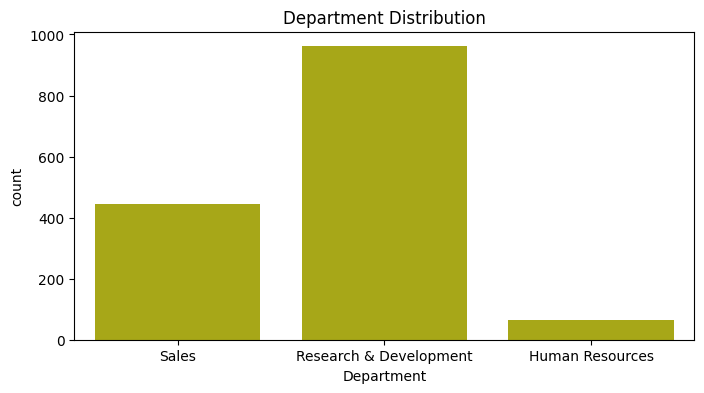

In [17]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["Department"], color = "y")
plt.title("Department Distribution")
plt.show()

Research & Development is by far the largest department (~950 employees).

Sales comes next (~450 employees).

Human Resources has the smallest number (~70 employees).

This shows the organisation is heavily R&D-driven, with Sales supporting it and HR operating as a much smaller administrative unit.

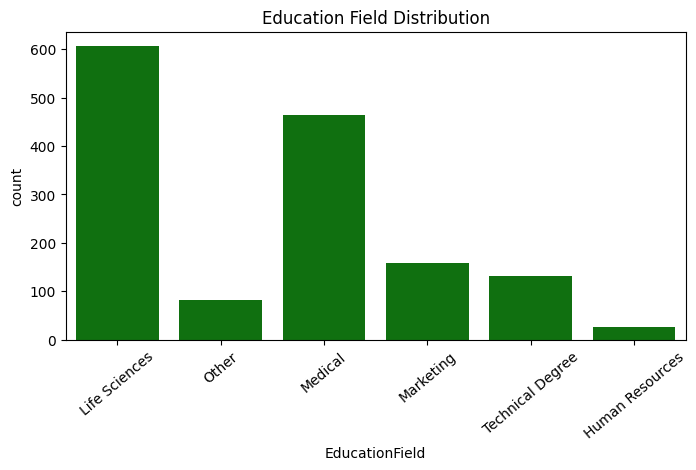

In [18]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["EducationField"], color = "g")
plt.title("Education Field Distribution")
plt.xticks(rotation = 40)
plt.show()

Most employees come from Life Sciences and Medical backgrounds.

Fields like Marketing, Technical Degree, and Other appear moderately represented.

Human Resources as an education field is the least common.

Overall, this reflects a company heavily staffed by scientific and technical professionals, aligned with what you’d expect in a research-focused organisation.

##**2.4. Relationships**

**Attrition vs. Categorical Features**

In [19]:
bytravel = pd.crosstab(
    df["BusinessTravel"],
    df["Attrition"],
    normalize="index"
)


In [20]:
bytravel

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569


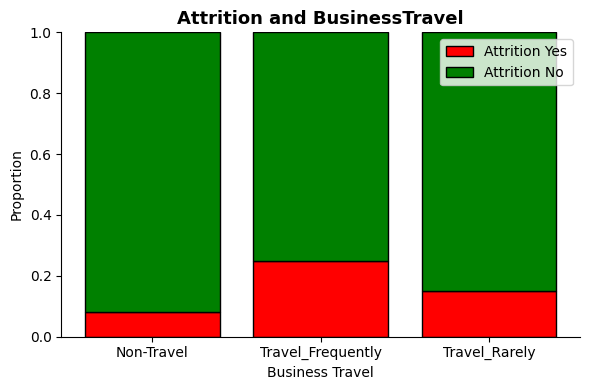

In [21]:

plt.figure(figsize=(6, 4))

categories = bytravel.index
yes_vals = bytravel["Yes"].values
no_vals  = bytravel["No"].values

x = np.arange(len(categories))

plt.bar(
    x,
    yes_vals,
    color="red",
    edgecolor="black",
    label="Attrition Yes"
)

plt.bar(
    x,
    no_vals,
    bottom=yes_vals,
    color="green",
    edgecolor="black",
    label="Attrition No"
)

plt.xticks(x, categories, rotation=0)
plt.ylabel("Proportion")
plt.xlabel("Business Travel")
plt.ylim(0, 1)
plt.grid(False)
sns.despine()
plt.legend()

plt.title("Attrition and BusinessTravel", fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()





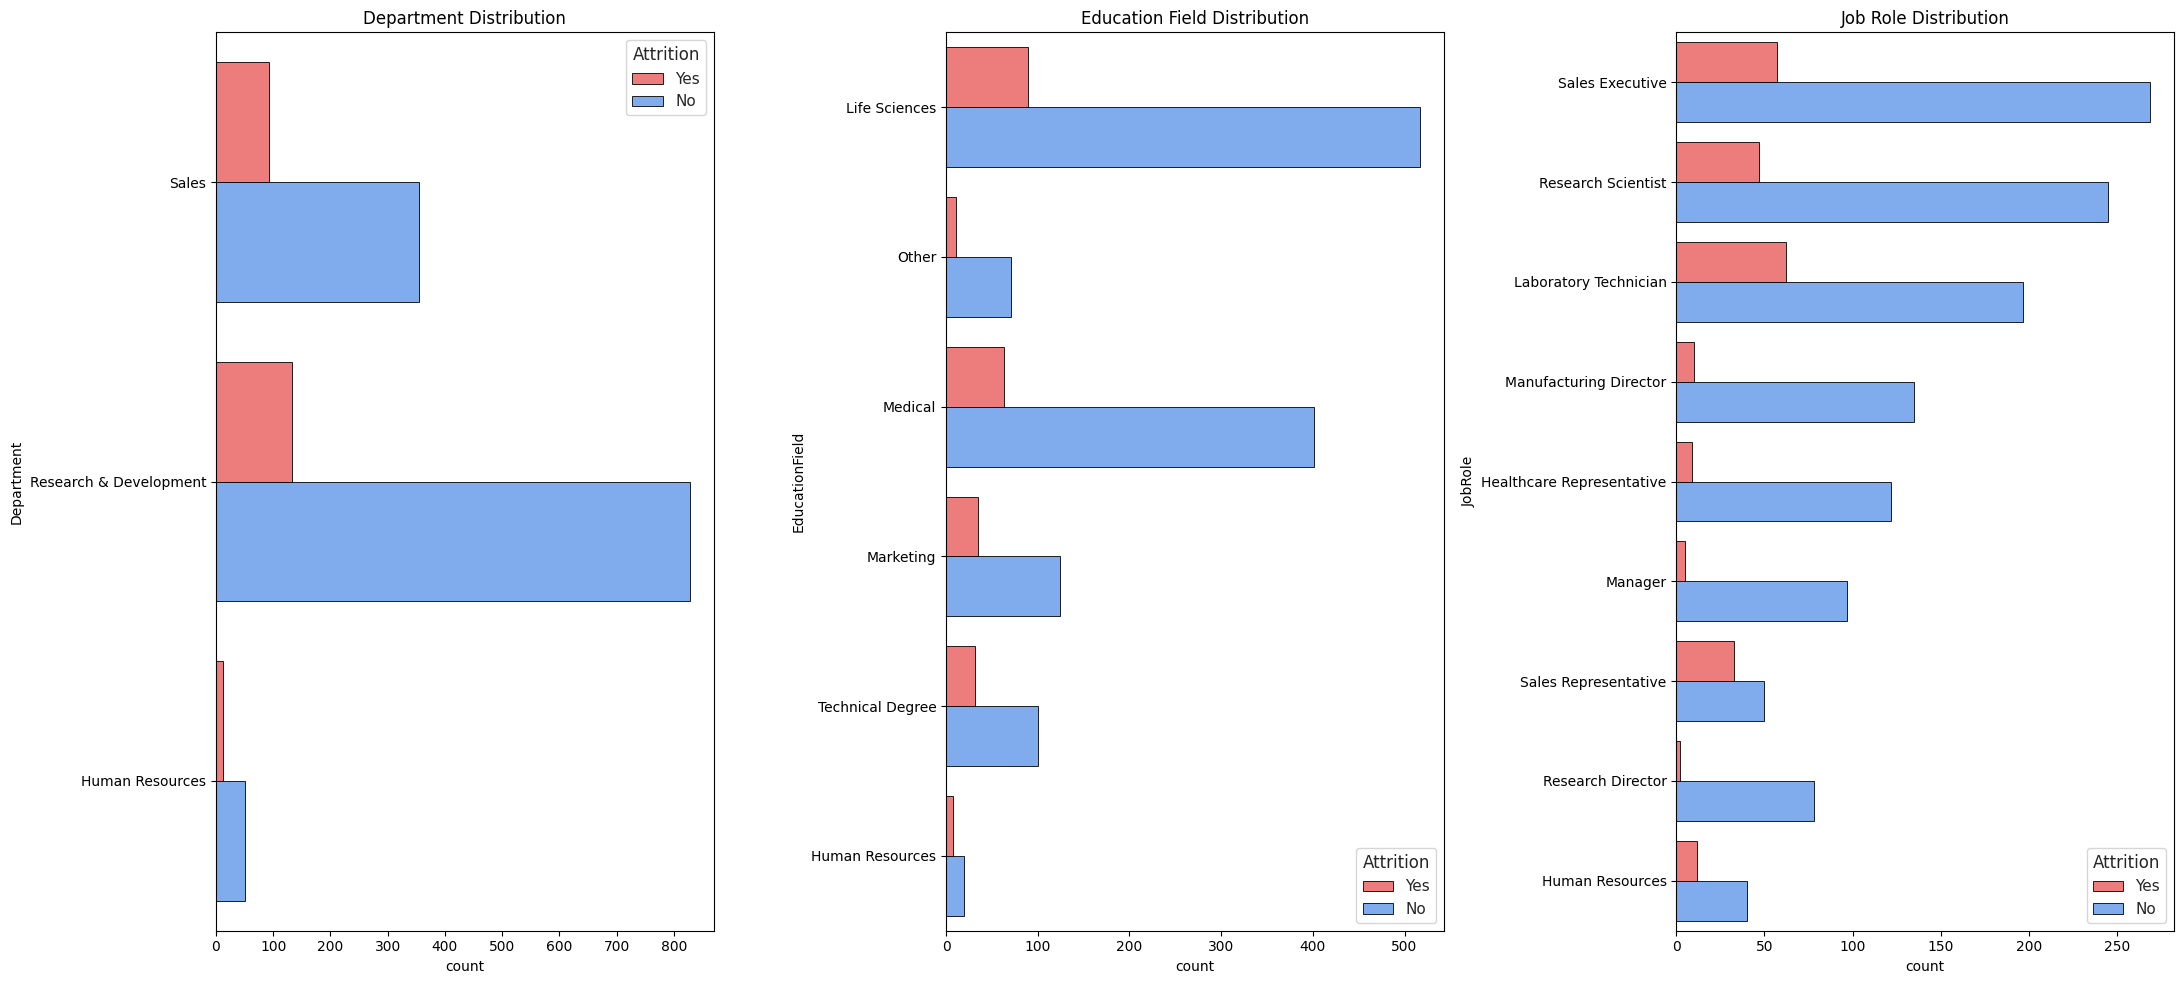

In [22]:
# Count plots for Job Role, Department, Education Field segmented by Attrition.

fig, axes = plt.subplots(1, 3, figsize=(22, 10))
sns.set_theme(style="whitegrid")

palette = ["#FF6B6B", "#6EA8FE"]

sns.countplot(
    data=df,
    y="Department",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[0]
)
axes[0].set_title("Department Distribution")

sns.countplot(
    data=df,
    y="EducationField",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[1]
)
axes[1].set_title("Education Field Distribution")

sns.countplot(
    data=df,
    y="JobRole",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[2]
)
axes[2].set_title("Job Role Distribution")

plt.tight_layout()
plt.show()


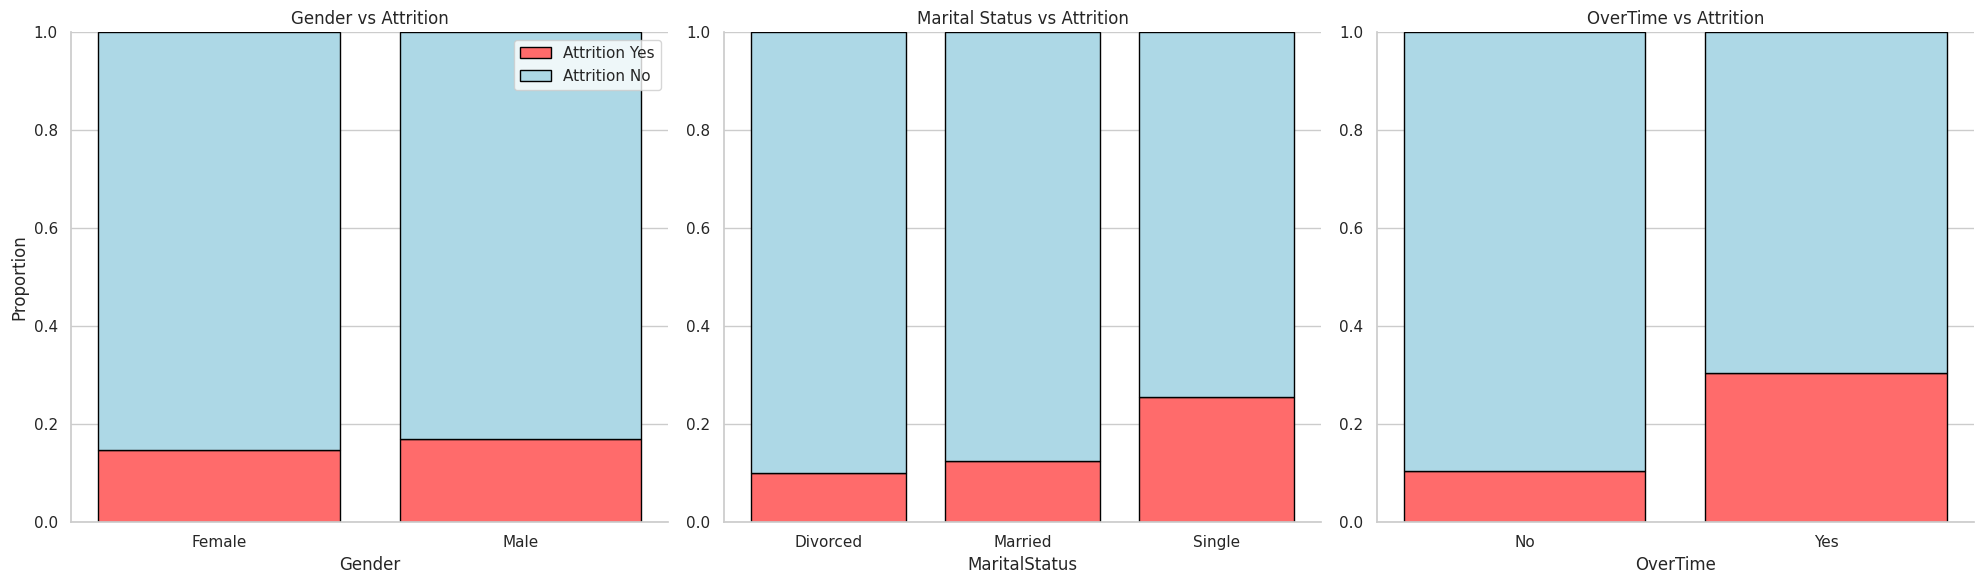

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="whitegrid")

features = ["Gender", "MaritalStatus", "OverTime"]
titles = ["Gender vs Attrition", "Marital Status vs Attrition", "OverTime vs Attrition"]

for i, col in enumerate(features):

    table = (
        df.groupby(col)["Attrition"]
          .value_counts(normalize=True)
          .unstack()
          [["Yes", "No"]]
    )

    x = np.arange(len(table.index))
    yes_vals = table["Yes"].values
    no_vals  = table["No"].values

    axes[i].bar(
        x,
        yes_vals,
        color="#FF6B6B",
        edgecolor="black",
        label="Attrition Yes"
    )

    axes[i].bar(
        x,
        no_vals,
        bottom=yes_vals,
        color="lightblue",
        edgecolor="black",
        label="Attrition No"
    )

    axes[i].set_xticks(x)
    axes[i].set_xticklabels(table.index)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel("Proportion")
    else:
        axes[i].set_ylabel("")

    sns.despine(ax=axes[i])

axes[0].legend()

plt.tight_layout()
plt.show()


**Attrition vs. numerical Features**



Compare Average Monthly income of who left and who stayed

In [24]:
left_df = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

In [25]:
avg_income_left = left_df['MonthlyIncome'].mean().round(2)
avg_income_stayed = stayed_df['MonthlyIncome'].mean().round(2)

In [26]:
avg_income_left

np.float64(4787.09)

In [27]:
avg_income_stayed

np.float64(6832.74)

In [28]:
income_diff = avg_income_stayed - avg_income_left
income_diff.round(2)

np.float64(2045.65)

In [29]:
left_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8,0.0,1,6,4,0.0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7,3.0,3,0,0,0.0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0.0,6,4.0,3,4,2,0.0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0.0,10,4.0,3,5,3,0.0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0.0,8,2.0,3,4,2,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1.0,1,3.0,2,1,0,1.0,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3.0,4,3.0,4,2,2,2.0,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1.0,14,4.0,1,10,9,9.0,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2.0,12,3.0,3,6,3,0.0,1


In [30]:
stayed_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10,3.0,3,10,7,1.0,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8,3.0,3,8,7,3.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6,3.0,3,2,2,2.0,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0.0,8,2.0,2,7,7,3.0,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3.0,12,3.0,2,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1.0,17,3.0,3,5,2,0.0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1.0,9,5.0,3,7,7,1.0,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1.0,6,0.0,3,6,2,0.0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,NaN,17,3.0,2,9,6,0.0,8


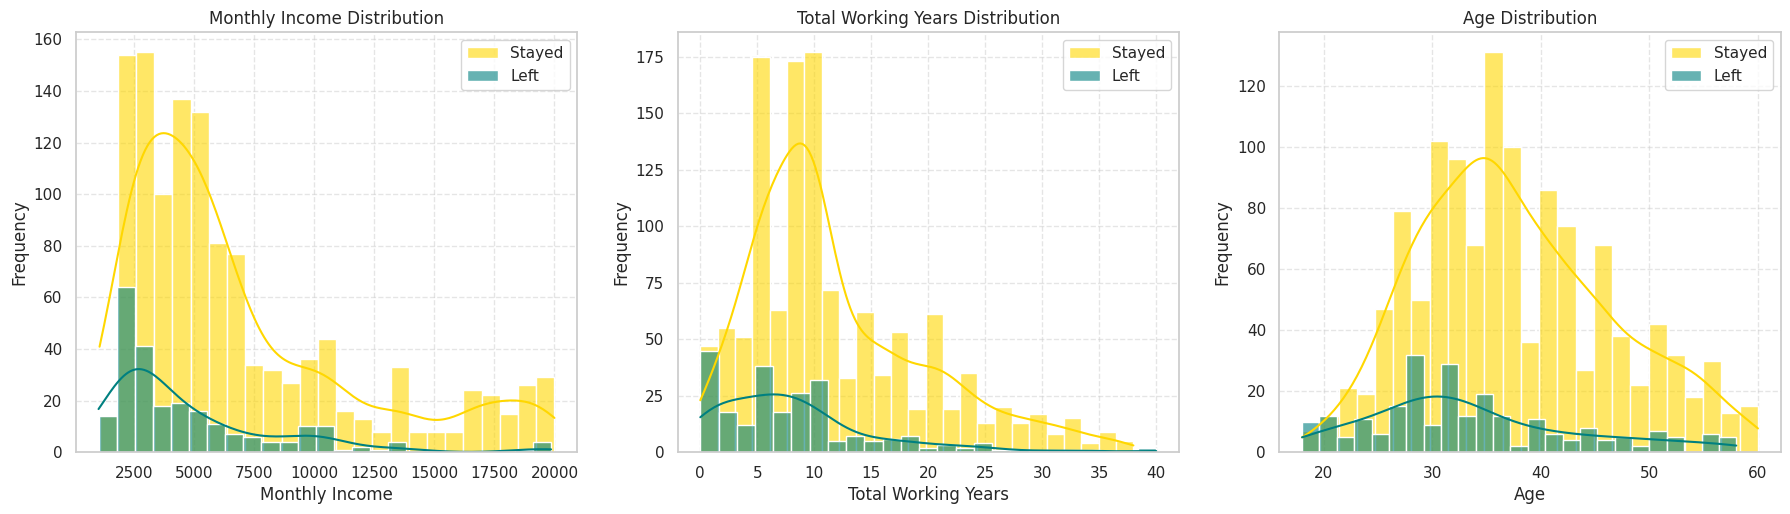

In [31]:
#distplots
sns.set_style("whitegrid")

plt.figure(figsize=(22, 12))

plt.subplot(2, 3, 1)
sns.histplot(stayed_df["MonthlyIncome"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["MonthlyIncome"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(2, 3, 2)
sns.histplot(stayed_df["TotalWorkingYears"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["TotalWorkingYears"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Total Working Years Distribution")
plt.xlabel("Total Working Years")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(2, 3, 3)
sns.histplot(stayed_df["Age"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["Age"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()






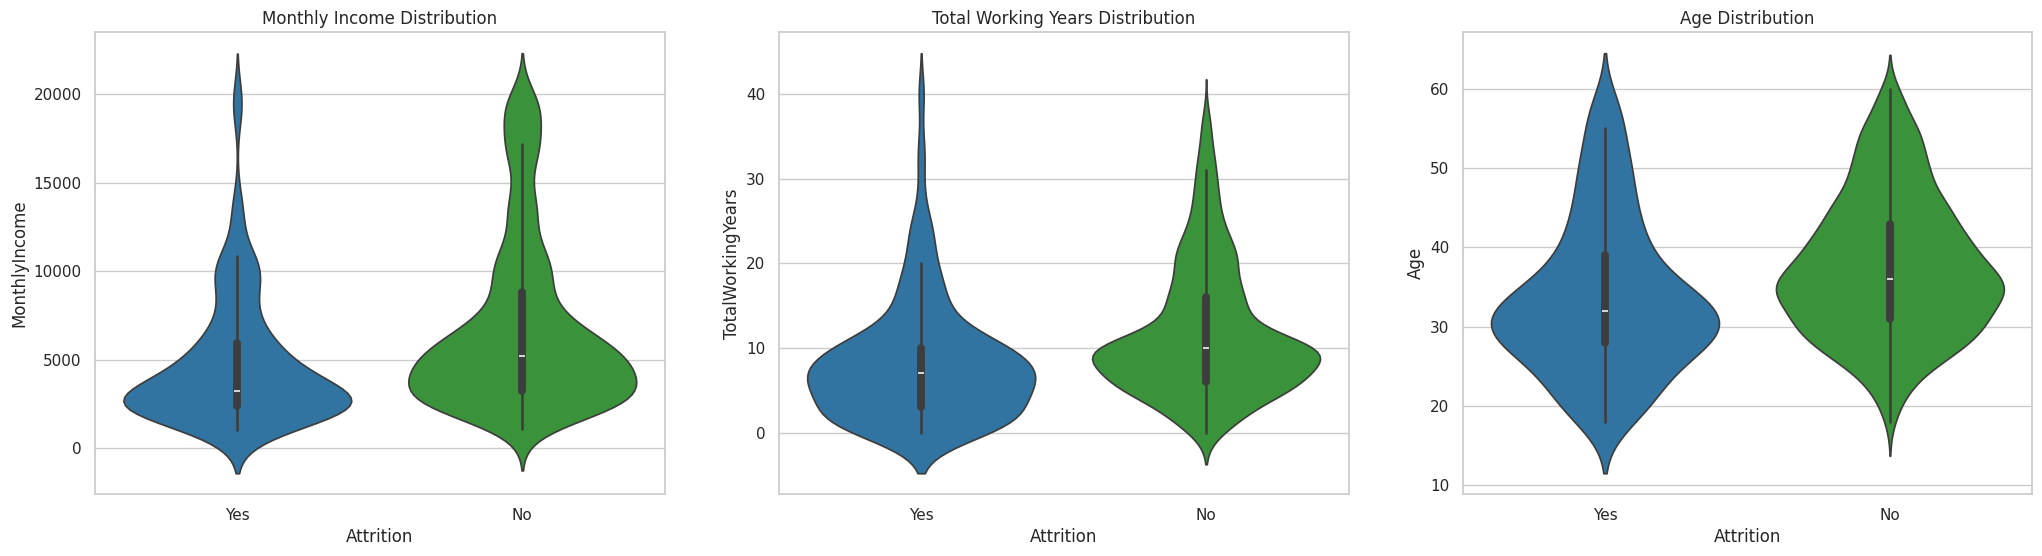

In [32]:

plt.figure(figsize = (25, 6))

palette = ["#1f77b4", "#2ca02c"]

# Monthly Income
plt.subplot(1, 3, 1)
sns.violinplot(data = df, x = "Attrition", y = "MonthlyIncome",
               hue = "Attrition", palette = palette)
plt.title("Monthly Income Distribution")

# Total Working Years
plt.subplot(1, 3, 2)
sns.violinplot(data = df, x = "Attrition", y = "TotalWorkingYears",
               hue = "Attrition", palette = palette)
plt.title("Total Working Years Distribution")

# Age
plt.subplot(1, 3, 3)
sns.violinplot(data = df, x = "Attrition", y = "Age",
               hue = "Attrition", palette = palette)
plt.title("Age Distribution")

plt.show()


Career progression features vs Attrition

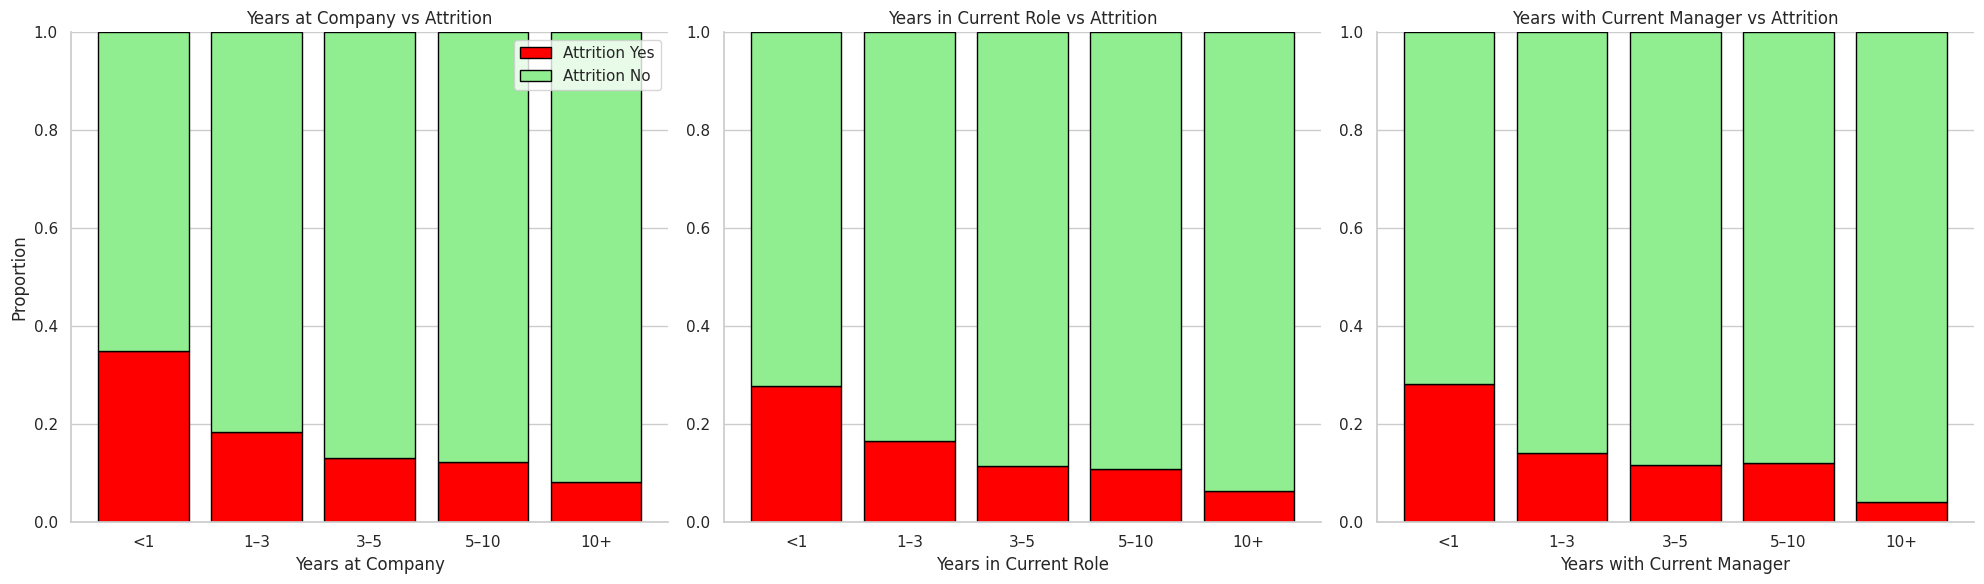

In [33]:

sns.set_theme(style="whitegrid")

career_features = {
    "YearsAtCompany": "Years at Company",
    "YearsInCurrentRole": "Years in Current Role",
    "YearsWithCurrManager": "Years with Current Manager"
}

bins = [0, 1, 3, 5, 10, 40]
labels = ["<1", "1–3", "3–5", "5–10", "10+"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (col, label_name) in zip(axes, career_features.items()):

    temp = df.copy()
    temp["bin"] = pd.cut(temp[col], bins=bins, labels=labels, include_lowest=True)

    table = (
        temp.groupby("bin")["Attrition"]
            .value_counts(normalize=True)
            .unstack()[["Yes", "No"]]
            .fillna(0)
    )

    x = np.arange(len(labels))
    yes_vals = table["Yes"].values
    no_vals  = table["No"].values

    ax.bar(x, yes_vals, color="red", edgecolor="black", label="Attrition Yes")
    ax.bar(x, no_vals, bottom=yes_vals, color="lightgreen", edgecolor="black", label="Attrition No")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.set_title(f"{label_name} vs Attrition")
    ax.set_xlabel(label_name)
    sns.despine(ax=ax)

axes[0].set_ylabel("Proportion")
axes[0].legend()

plt.tight_layout()
plt.show()




Satisfaction and experince vs Attrition

In [34]:
sns.set_theme(style="whitegrid")

# Satisfaction / experience features to compare
satisfaction_features = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement"
]

df_clean = df.copy()
df_clean["Attrition"] = df_clean["Attrition"].str.strip().str.title()   # "yes"/"Yes " -> "Yes"

grouped_means = df_clean.groupby("Attrition")[satisfaction_features].mean()

print(grouped_means)

           JobSatisfaction  EnvironmentSatisfaction  WorkLifeBalance  \
Attrition                                                              
No                2.778589                 2.771290         2.781022   
Yes               2.468354                 2.464135         2.658228   

           JobInvolvement  
Attrition                  
No               2.770479  
Yes              2.518987  


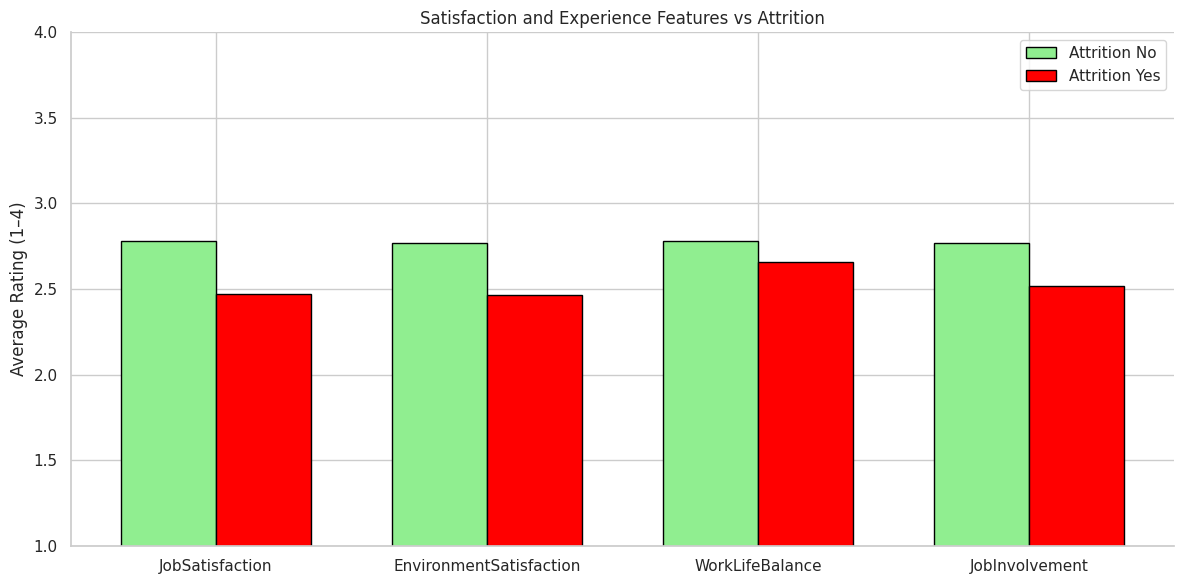

In [35]:

sns.set_theme(style="whitegrid")

# Satisfaction / experience features to compare
satisfaction_features = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement"
]

x = np.arange(len(satisfaction_features))
bar_width = 0.35

plt.figure(figsize=(12, 6))

# Bars for Attrition No (stayed)
plt.bar(
    x - bar_width / 2,
    grouped_means.loc["No"],
    width=bar_width,
    color="lightgreen",
    edgecolor="black",
    label="Attrition No"
)

# Bars for Attrition Yes (left)
plt.bar(
    x + bar_width / 2,
    grouped_means.loc["Yes"],
    width=bar_width,
    color="red",
    edgecolor="black",
    label="Attrition Yes"
)

plt.xticks(x, satisfaction_features, rotation=0)
plt.ylim(1, 4)  # ratings go from 1 to 4
plt.ylabel("Average Rating (1–4)")
plt.title("Satisfaction and Experience Features vs Attrition")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()



**Correlation matrix for all numberical features**

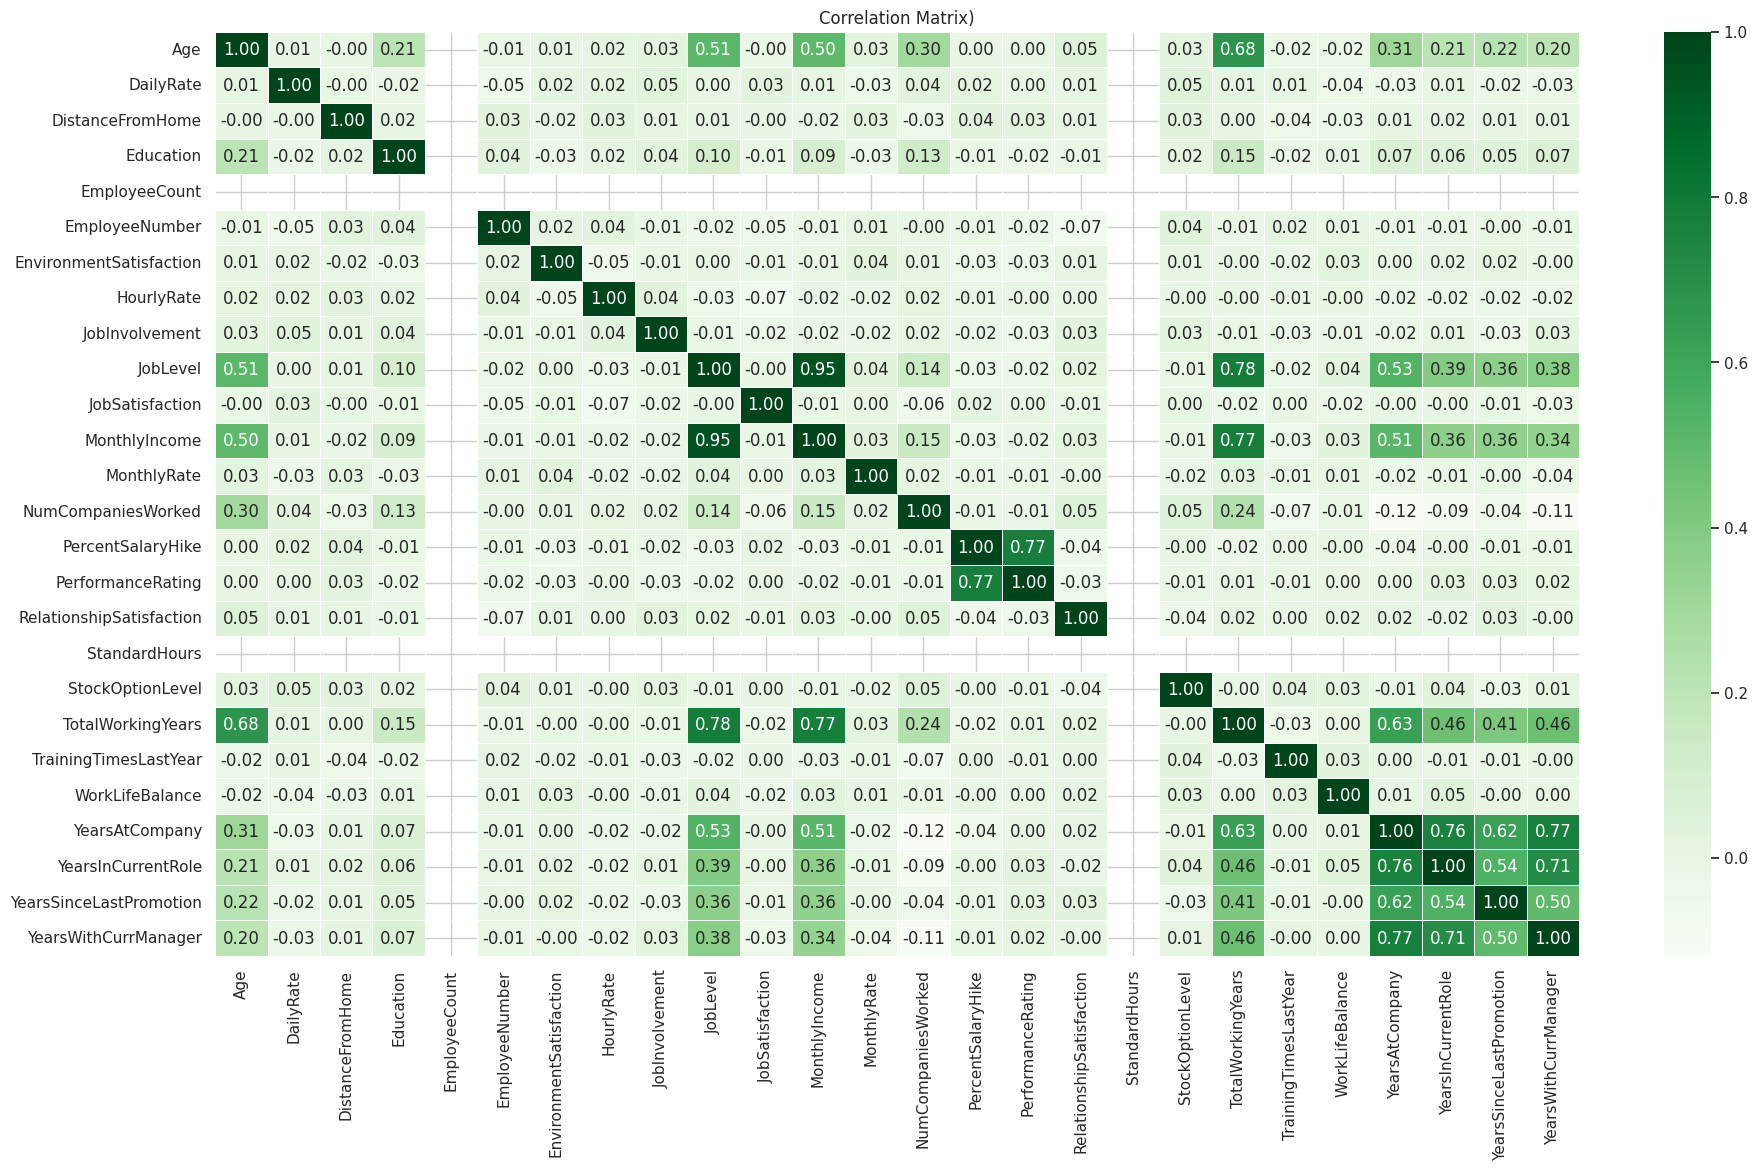

In [36]:
corr_matrix = df.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(22, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="Greens",
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Matrix)")
plt.show()

##**2.5. Outlier Detection**

 EXTRA NUMERIC FEATURES: chosen to identify meaningful outliers

YearsAtCompany: long-tenure employees

YearsSinceLastPromotion: very delayed promotions

YearsInCurrentRole: role stagnation

DistanceFromHome: long commutes

NumCompaniesWorked: frequent job changers

Box plots to detect outliers in the dataset

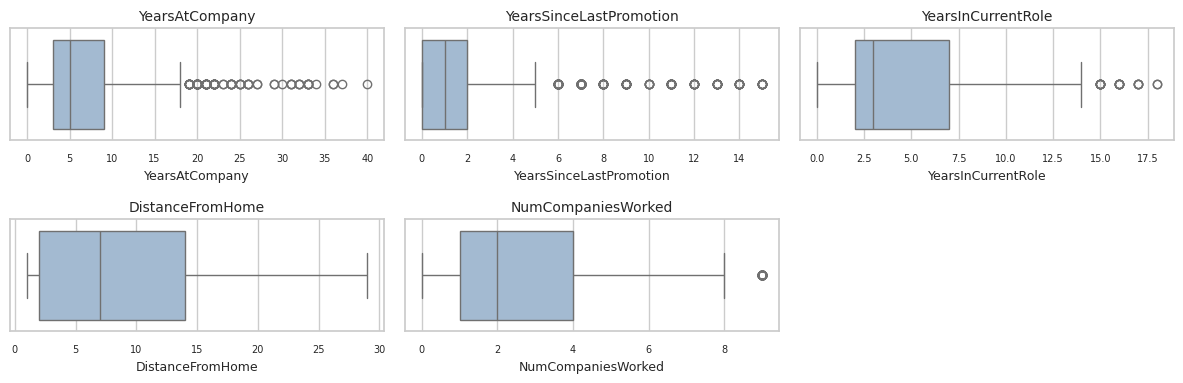

In [37]:
sns.set_theme(style="whitegrid")

outlier_features = [
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsInCurrentRole",
    "DistanceFromHome",
    "NumCompaniesWorked"
]

fig, axes = plt.subplots(2, 3, figsize=(12, 4))

axes = axes.flatten()

for i, col in enumerate(outlier_features):
    sns.boxplot(x=df[col], ax=axes[i], color="#9BBAD9")
    axes[i].set_title(col, fontsize=10)

    # Label x and y axes
    axes[i].set_xlabel(col, fontsize=9)

    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

# Remove the empty last subplot (slot #5)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

##**2.6. Target Variable Balance**

Class distribution of the target variable - Attrition

percentage of employees who left and stayed which is attrition Yes or No

In [38]:
left_count = df["Attrition"].value_counts()["Yes"]
stayed_count = df["Attrition"].value_counts()["No"]
total_emps = df.shape[0]

In [39]:
left_per = round((left_count / total_emps) * 100, 2)
left_per

np.float64(16.12)

In [40]:
stayed_per = round((stayed_count / total_emps) * 100, 2)
stayed_per

np.float64(83.88)

In [41]:
counts = df['Attrition'].value_counts()
percentages = df['Attrition'].value_counts(normalize=True).mul(100)

summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})

summary


,Count,Percentage (%)
Attrition,,
No,1233,83.88
Yes,237,16.12


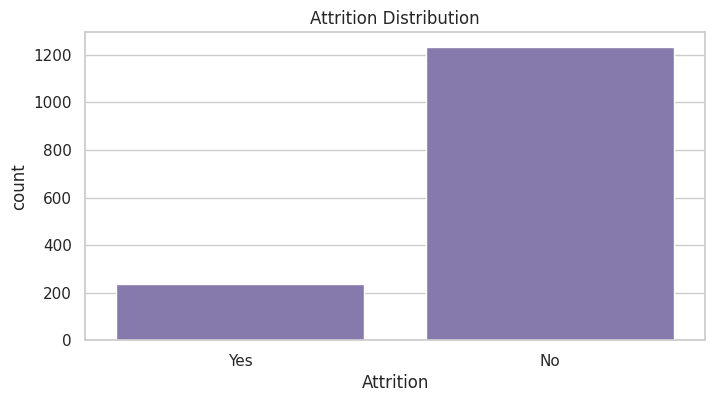

In [42]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["Attrition"], color = "m")
plt.title("Attrition Distribution")
plt.show()

 # **Section 3: Data Preprocessing and Cleaning**

We’ll use this section to prepare the IBM HR Employee Attrition dataset for a classification model that predicts whether an employee will leave the company. We’ll systematically check common data quality issues (missing values, duplicates, incorrect data types, constant or irrelevant features, and target imbalance), clean them where necessary, and encode the target variable Attrition as 0/1 so the data is ready for later model building. At each stage, we’ll start with a reasonable assumption and then confirm or reject it using code.

###**3.1 Handling Missing Values**`

We assume there might be missing values and we want to find out if that is actually true.


In [43]:
missing_per_column = df.isna().sum()
total_missing = missing_per_column.sum()

In [44]:
print("Total missing values in dataset:", total_missing)
print("\nMissing values per column:")
print(missing_per_column[missing_per_column > 0])

Total missing values in dataset: 749

Missing values per column:
StockOptionLevel           514
TrainingTimesLastYear      103
YearsSinceLastPromotion    132
dtype: int64


We have 749 missing values spread across 3 features. We must decide on what to do; median imputation will be the best approach rather than removing columns because it replaces missing values with the middle value of the data, which prevents extreme values from skewing the results.

Since our features are numeric and may be unevenly distributed, the median provides a stable and realistic estimate that preserves the overall pattern of the data without introducing bias.

In [45]:
df["StockOptionLevel"].fillna(df["StockOptionLevel"].median(), inplace=True)
df["TrainingTimesLastYear"].fillna(df["TrainingTimesLastYear"].median(), inplace=True)
df["YearsSinceLastPromotion"].fillna(df["YearsSinceLastPromotion"].median(), inplace=True)

###**3.2 Identification and Removal of Duplicate Entries**`

Now we test whether the dataset contains duplicated records.

In [46]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


0 duplicates, therefore our hypothesis is rejected.

### **3.3 Data Types Review**

We expect certain columns like years and levels to be integers, but might be stored as 'float64'.

In [47]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


StockOptionLevel and YearsSinceLastPromotion are both floats when they should be integers. Reason: they're are decimals and this makes no sense conceptually. Therefore, we will convert them to integers.

In [48]:
df["StockOptionLevel"] = df["StockOptionLevel"].astype(int)
df["YearsSinceLastPromotion"] = df["YearsSinceLastPromotion"].astype(int)

In [49]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


All integer-based columns shown are correctly typed. This is because they represent counts (YearsAtCompany), ratings (JobSatisfaction), and employee identifiers (EmployeeNumber) which is the appropriate datatype for such features.

The following features are correctly identified as 'objects': Department, BusinessTravel, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

Later, we will encode them later for feature engineering prep.

### **3.4 Evaluation of Non-Informative Features**

In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We will remove the following features from our dataset: EmployeeCount, StandardHours, Over18, EmployeeNumber. Reason: These features will be removed because they are constant or contain no meaningful variation, meaning they cannot contribute to the predictive power of the classification model.

In [51]:
df = df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"])

### **3.5 Encoding Target for Classification**

Categorical features must be encoded because machine learning models cannot interpret text labels directly. In this dataset, features such as BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, and OverTime contain non-numeric categories. These values represent groups rather than quantities, so they need to be transformed into numerical form (e.g., using one-hot encoding) to ensure the model can process them correctly.

In [ ]:
# List of nominal categorical columns
nominal_cols = df.select_dtypes(include='object').columns

# Print value counts for each
for col in nominal_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director            

In [53]:
le = LabelEncoder()

binary_cols = ['OverTime', 'Gender', 'Attrition']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [54]:
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)
df.columns = df.columns.str.replace(' ', '_')

In [55]:
df.shape

(1470, 45)

In [56]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human_Resources,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


##**3.4. Train Test Split**

To evaluate how well the model can predict employee attrition on unseen data, we implement a train–test split. This divides the dataset into a training set, used to fit the model, and a test set, used to assess its performance.

Splitting the data ensures the model is not evaluated on the same data it was trained on, which helps prevent overfitting and provides a more realistic measure of how the model would perform in real-world scenarios.

In [57]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # **Section 4: Model Training**

The Logistic Regression model was created using the LogisticRegression() function and then trained using the .fit(X_train, y_train) method. This allowed the model to learn patterns in the training data and understand how different employee features relate to the likelihood of attrition.

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

The Random Forest model was created using RandomForestClassifier() and trained with .fit(X_train, y_train). This model learns by building many decision trees and combining their results, allowing it to capture more complex patterns in the data related to employee attrition.

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

The XGBoost model was created using XGBClassifier() and trained with .fit(X_train, y_train). XGBoost learns patterns by building decision trees one at a time, with each new tree correcting errors made by the previous ones. This helps the model capture detailed relationships in the data that may influence employee attrition.

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

 # **Section 5: Model Evaluation**

##**5.1. Model Prediction**


In [ ]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

##**5.2. Classification Report**

In [ ]:
print("Classification Report for Logistic Regression Model:\n")
print(classification_report(y_test, lr_pred))

Classification Report for Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



In [ ]:
print("Classification Report for Random Forest Model:\n")
print(classification_report(y_test, rf_pred))

Classification Report for Random Forest Model:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [ ]:
print("Classification Report for XGBoost Model:\n")
print(classification_report(y_test, xgb_pred))

Classification Report for XGBoost Model:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.26      0.35        39

    accuracy                           0.87       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



##**5.3. Confusion Matrix**

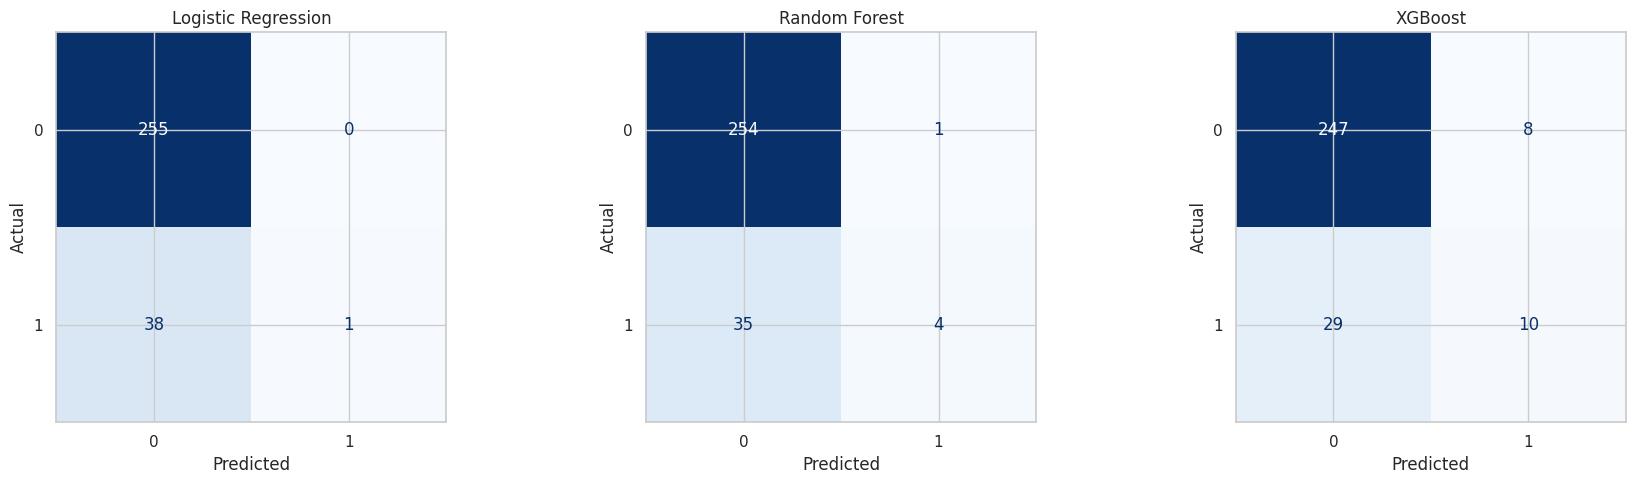

In [ ]:
# ============================================================
#  CONFUSION MATRIX GRAPH
# ============================================================

models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred
}

# Create exact number of axes dynamically
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


 # **Section 6: Hyperparameter Tuning & Model Optimisation (Olamide Olumomi)**

##**6.1. Handling Imbalance in dataset: SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
# SMOTE Algorithm for oversampling minority class (Attrition)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Logistic Regression needs scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression with SMOTE data**

In [ ]:
# Train Logistic Regression
smote_lr_model = LogisticRegression(max_iter=1000)
smote_lr_model.fit(X_train_scaled, y_res)

smote_lr_pred = smote_lr_model.predict(X_test_scaled)

print(classification_report(y_test, smote_lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.56      0.49      0.52        39

    accuracy                           0.88       294
   macro avg       0.74      0.71      0.73       294
weighted avg       0.87      0.88      0.88       294



**Random Forest with SMOTE data**

In [ ]:
smote_rf_model = RandomForestClassifier()
smote_rf_model.fit(X_res, y_res)

smote_rf_pred = smote_rf_model.predict(X_test)
print(classification_report(y_test, smote_rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



**XGBoost with SMOTE data**

In [ ]:
smote_xgb_model = XGBClassifier()
smote_xgb_model.fit(X_res, y_res)

smote_xgb_pred = smote_xgb_model.predict(X_test)
print(classification_report(y_test, smote_xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.50      0.33      0.40        39

    accuracy                           0.87       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.85      0.87      0.86       294



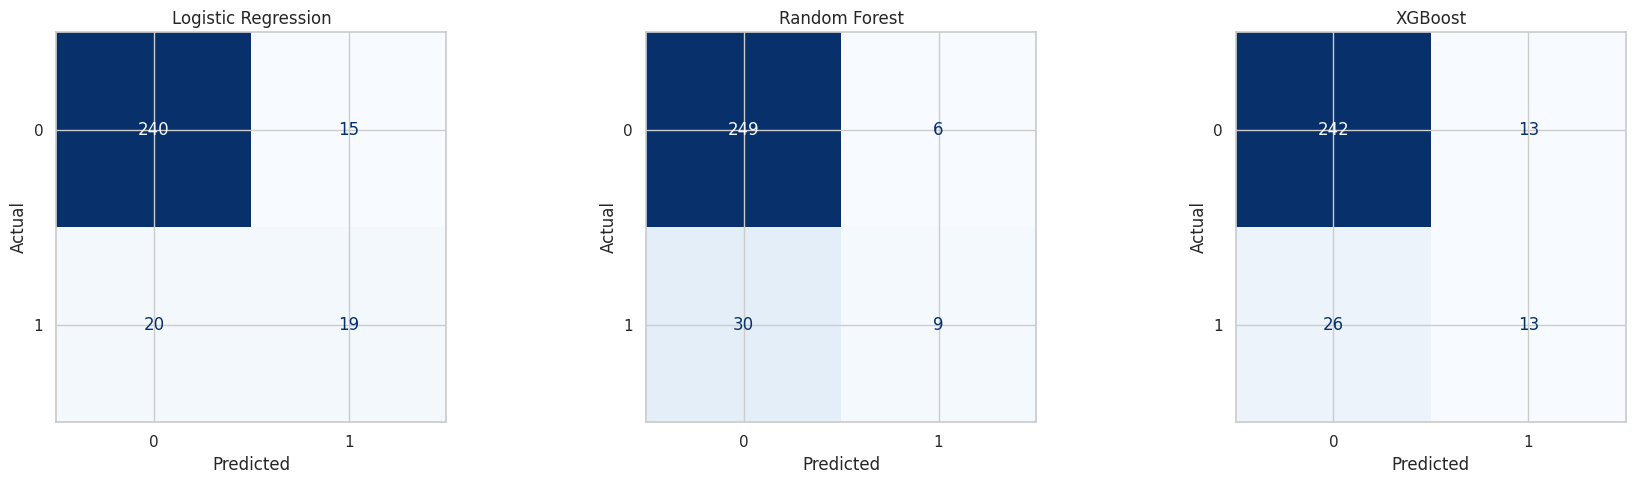

In [ ]:
models = {
    "Logistic Regression": smote_lr_pred,
    "Random Forest": smote_rf_pred,
    "XGBoost": smote_xgb_pred
}

# Create exact number of axes dynamically
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

##**6.2. Hyper Parameter Tuning: Grid Search**

**Parameters for all models**

In [ ]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # required for l1
    'class_weight': ['balanced']  # handle imbalance
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

**Grid Search for Logistic Regression Model**

In [ ]:
lr_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=lr_param_grid,
    scoring='recall',  # optimize for minority class
    cv=5,
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_res)
print("Best LR Params:", lr_grid.best_params_)

Best LR Params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


**Grid Search for Random Forest Model**

In [ ]:
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_res, y_res)
print("Best RF Params:", rf_grid.best_params_)

Best RF Params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Grid Search for XGBoost Model**

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_res, y_res)
print("Best XGB Params:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


**Evaluate Model Performances**

In [ ]:
best_lr = lr_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# Predict on test set
lr_pred = best_lr.predict(X_test_scaled)
rf_pred = best_rf.predict(X_test)
xgb_pred = best_xgb.predict(X_test)

In [ ]:
print("\nLogistic Regression Report\n")
print(classification_report(y_test, lr_pred))

print("\nRandom Forest Report\n")
print(classification_report(y_test, rf_pred))

print("\nXGBoost Report\n")
print(classification_report(y_test, xgb_pred))


Logistic Regression Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.49      0.53        39

    accuracy                           0.88       294
   macro avg       0.75      0.72      0.73       294
weighted avg       0.88      0.88      0.88       294


Random Forest Report

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.52      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294


XGBoost Report

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weigh

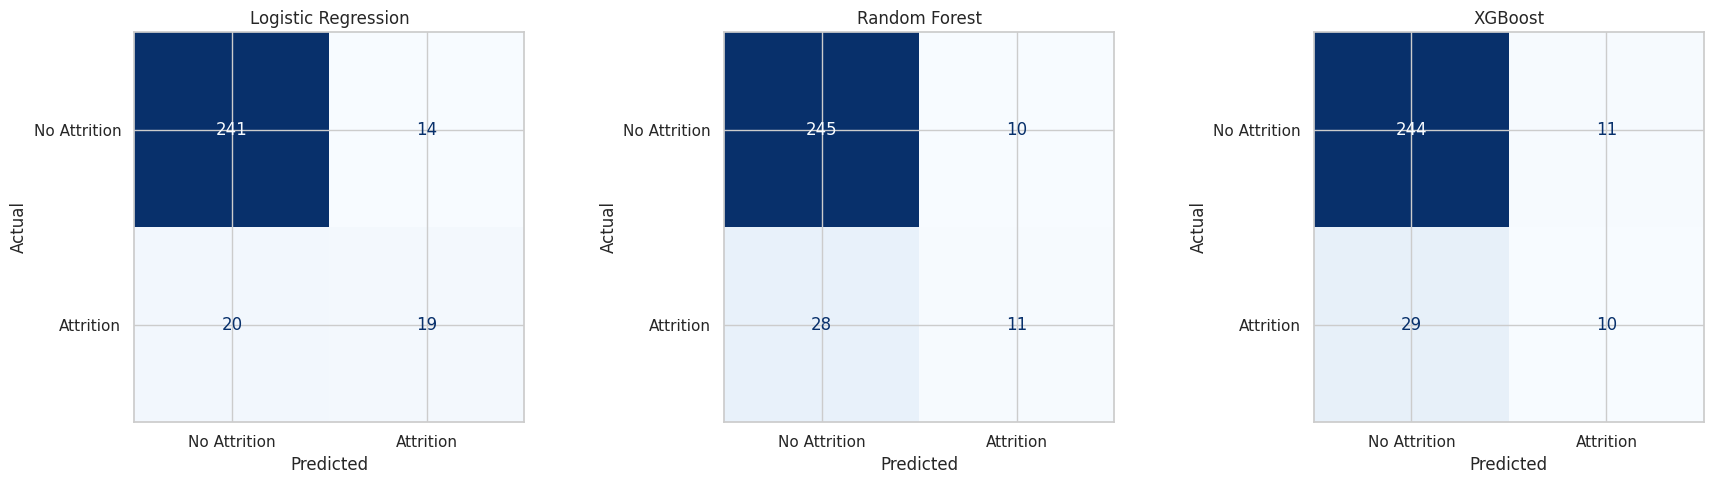

In [ ]:
models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred
}

fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["No Attrition", "Attrition"])
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

##**6.2. Hyper Parameter Tuning: Treshold**

In [ ]:
lr_probs = best_lr.predict_proba(X_test_scaled)[:,1]
rf_probs = best_rf.predict_proba(X_test)[:,1]
xgb_probs = best_xgb.predict_proba(X_test)[:,1]

In [ ]:
def tune_threshold(y_true, probs, model_name):
    thresholds = np.arange(0.1, 0.9, 0.05)

    print(f"\n{model_name} Threshold Tuning:\n")

    best_f1 = 0
    best_thresh = 0.5

    for t in thresholds:
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_true, preds)
        recall = recall_score(y_true, preds)

        print(f"Threshold {t:.2f} | F1: {f1:.3f} | Recall: {recall:.3f}")

        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    print(f"\nBest threshold for {model_name}: {best_thresh} (F1 = {best_f1:.3f})")
    return best_thresh

In [ ]:
lr_thresh = tune_threshold(y_test, lr_probs, "Logistic Regression")
rf_thresh = tune_threshold(y_test, rf_probs, "Random Forest")
xgb_thresh = tune_threshold(y_test, xgb_probs, "XGBoost")


Logistic Regression Threshold Tuning:

Threshold 0.10 | F1: 0.316 | Recall: 0.641
Threshold 0.15 | F1: 0.373 | Recall: 0.641
Threshold 0.20 | F1: 0.413 | Recall: 0.641
Threshold 0.25 | F1: 0.444 | Recall: 0.615
Threshold 0.30 | F1: 0.469 | Recall: 0.590
Threshold 0.35 | F1: 0.495 | Recall: 0.590
Threshold 0.40 | F1: 0.518 | Recall: 0.564
Threshold 0.45 | F1: 0.545 | Recall: 0.538
Threshold 0.50 | F1: 0.528 | Recall: 0.487
Threshold 0.55 | F1: 0.537 | Recall: 0.462
Threshold 0.60 | F1: 0.540 | Recall: 0.436
Threshold 0.65 | F1: 0.525 | Recall: 0.410
Threshold 0.70 | F1: 0.415 | Recall: 0.282
Threshold 0.75 | F1: 0.320 | Recall: 0.205
Threshold 0.80 | F1: 0.298 | Recall: 0.179
Threshold 0.85 | F1: 0.182 | Recall: 0.103

Best threshold for Logistic Regression: 0.45000000000000007 (F1 = 0.545)

Random Forest Threshold Tuning:

Threshold 0.10 | F1: 0.249 | Recall: 0.949
Threshold 0.15 | F1: 0.275 | Recall: 0.872
Threshold 0.20 | F1: 0.309 | Recall: 0.769
Threshold 0.25 | F1: 0.348 | Recall

In [ ]:
lr_final = (lr_probs >= lr_thresh).astype(int)
rf_final = (rf_probs >= rf_thresh).astype(int)
xgb_final = (xgb_probs >= xgb_thresh).astype(int)

In [ ]:
print("\nFinal Logistic Regression Report:")
print(classification_report(y_test, lr_final))

print("\nFinal Random Forest Report:")
print(classification_report(y_test, rf_final))

print("\nFinal XGBoost Report:")
print(classification_report(y_test, xgb_final))


Final Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       255
           1       0.55      0.54      0.55        39

    accuracy                           0.88       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.88      0.88      0.88       294


Final Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       255
           1       0.31      0.51      0.39        39

    accuracy                           0.79       294
   macro avg       0.61      0.67      0.63       294
weighted avg       0.84      0.79      0.81       294


Final XGBoost Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       255
           1       0.39      0.41      0.40        39

    accuracy                           0.84       294
   macro avg       0.65      0.66      0.

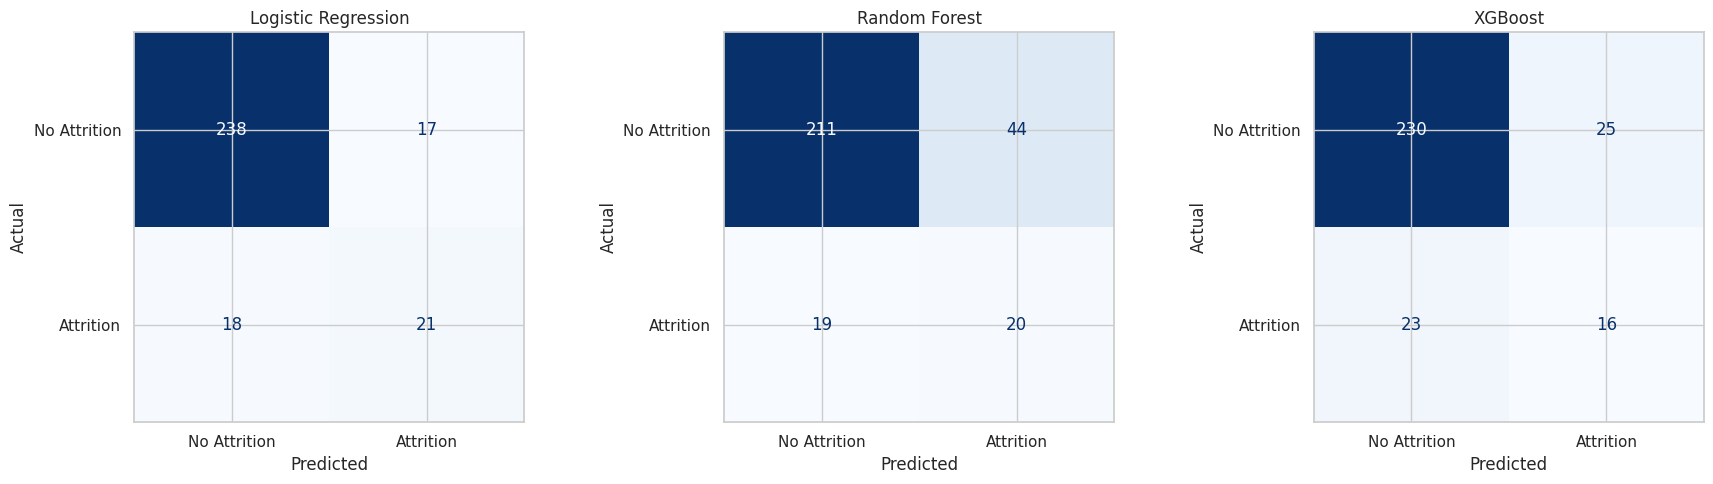

In [ ]:
models = {
    "Logistic Regression": lr_final,
    "Random Forest": rf_final,
    "XGBoost": xgb_final
}

# Create subplots dynamically
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Attrition", "Attrition"]
    )
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

##**6.4. Model Comparison**

In [ ]:
sets = {
    "SMOTE Only": {
        "Logistic Regression": smote_lr_pred,
        "Random Forest": smote_rf_pred,
        "XGBoost": smote_xgb_pred
    },
    "Grid+Threshold": {
         "Logistic Regression": lr_final,
          "Random Forest": rf_final,
          "XGBoost": xgb_final
    }
}

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

rows = []

for set_name, models_dict in sets.items():
    for model_name, preds in models_dict.items():
        report = classification_report(y_test, preds, output_dict=True)
        rows.append({
            "Set": set_name,
            "Model": model_name,
            "Accuracy": report["accuracy"],
            "Precision (Attrition)": report["1"]["precision"],
            "Recall (Attrition)": report["1"]["recall"],
            "F1-score (Attrition)": report["1"]["f1-score"]
        })

results_df = pd.DataFrame(rows)
results_df


,Set,Model,Accuracy,Precision (Attrition),Recall (Attrition),F1-score (Attrition)
0,SMOTE Only,Logistic Regression,0.880952,0.558824,0.487179,0.520548
1,SMOTE Only,Random Forest,0.877551,0.600000,0.230769,0.333333
2,SMOTE Only,XGBoost,0.867347,0.500000,0.333333,0.400000
3,Grid+Threshold,Logistic Regression,0.880952,0.552632,0.538462,0.545455
4,Grid+Threshold,Random Forest,0.785714,0.312500,0.512821,0.388350
5,Grid+Threshold,XGBoost,0.836735,0.390244,0.410256,0.400000


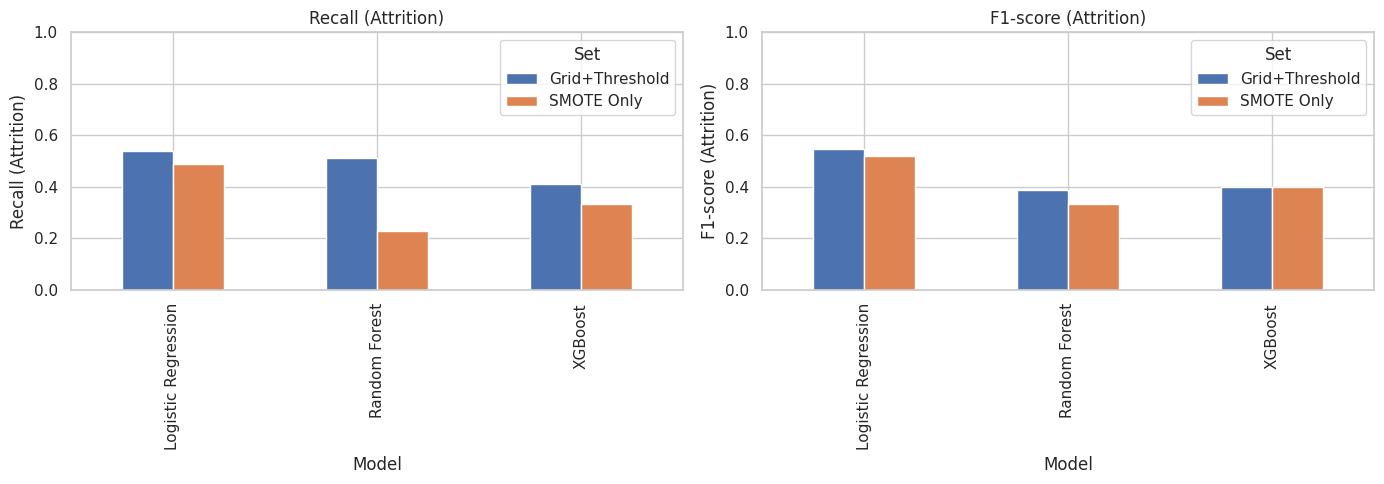

In [ ]:
# Compare Recall and F1-score
metrics_to_plot = ["Recall (Attrition)", "F1-score (Attrition)"]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(14,5))

for i, metric in enumerate(metrics_to_plot):
    results_df.pivot(index="Model", columns="Set", values=metric).plot(
        kind="bar", ax=axes[i], title=metric
    )
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0,1)

plt.tight_layout()
plt.show()

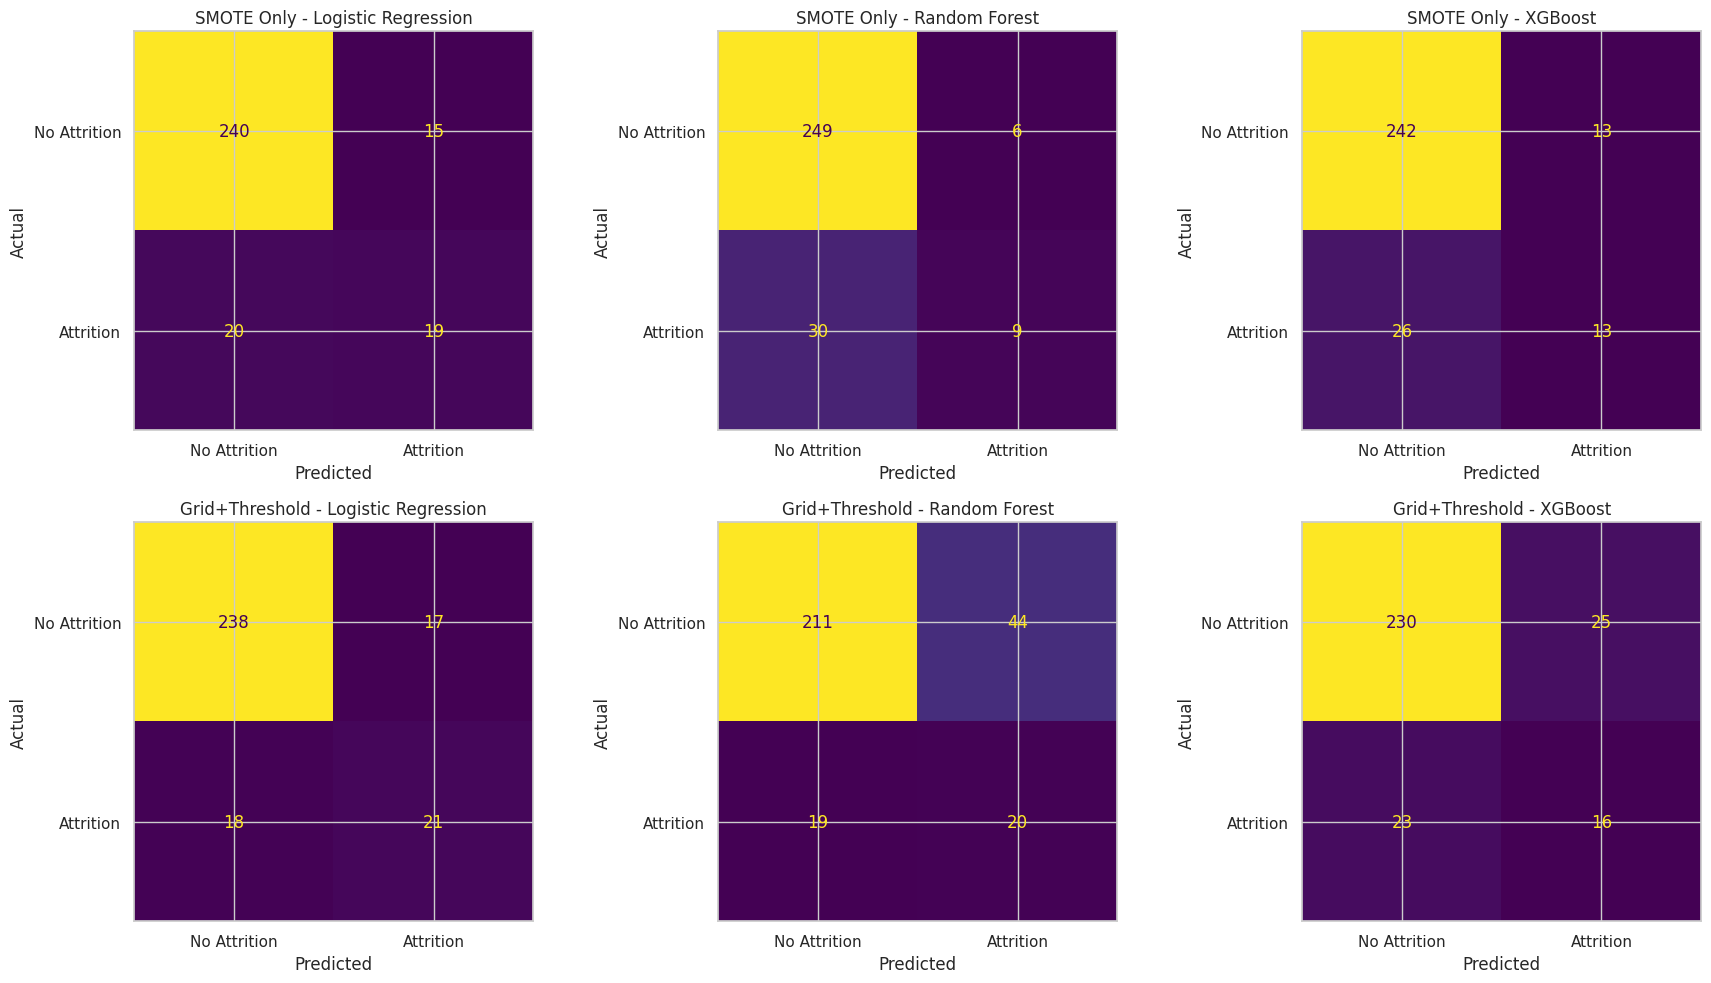

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows (sets), 3 cols (models)

for i, (set_name, models_dict) in enumerate(sets.items()):
    for j, (model_name, preds) in enumerate(models_dict.items()):
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(cm, display_labels=["No Attrition", "Attrition"])
        disp.plot(ax=axes[i,j], colorbar=False, values_format='d')
        axes[i,j].set_title(f"{set_name} - {model_name}")
        axes[i,j].set_xlabel("Predicted")
        axes[i,j].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
best_row = results_df.loc[results_df["F1-score (Attrition)"].idxmax()]
print("Best Model Overall:\n", best_row)

Best Model Overall:
 Set                           Grid+Threshold
Model                    Logistic Regression
Accuracy                            0.880952
Precision (Attrition)               0.552632
Recall (Attrition)                  0.538462
F1-score (Attrition)                0.545455
Name: 3, dtype: object


##**6.5. Feature Importance**

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df.head(15)


NameError: name 'best_model' is not defined